In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [4]:
# Function to detect encoding and read CSV
def extract_data(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read(10000))  # Detect encoding
        detected_encoding = result['encoding']
    return pd.read_csv(file_path, encoding=detected_encoding)

# Load data
file_path = "sales_data_sample.csv"  # Update with your actual file
print("Extracting data...")
data = extract_data(file_path)

# Display first few rows
data.head()

Extracting data...


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
# Function to clean and preprocess data
def transform_data(df):
    df.dropna(inplace=True)  # Remove missing values
    df.drop_duplicates(inplace=True)  # Remove duplicate entries
    if 'Sales' in df.columns:
        df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')  # Convert Sales column to float safely
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert Date column to datetime safely
    df.dropna(inplace=True)  # Remove any rows with conversion errors
    return df

print("Transforming data...")
cleaned_data = transform_data(data)

# Display transformed data
cleaned_data.head()

Transforming data...


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
10,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
21,10361,20,72.55,13,1451.00,12/17/2004 0:00,Shipped,4,12,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Small
40,10270,21,100.00,9,4905.39,7/19/2004 0:00,Shipped,3,7,2004,...,"Monitor Money Building, 815 Pacific Hwy",Level 6,Chatswood,NSW,2067,Australia,APAC,Huxley,Adrian,Medium
47,10347,30,100.00,1,3944.70,11/29/2004 0:00,Shipped,4,11,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
51,10391,24,100.00,4,2416.56,3/9/2005 0:00,Shipped,1,3,2005,...,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna,Small


In [6]:
# Function to save cleaned data
def load_data(df, output_path):
    df.to_csv(output_path, index=False, encoding='utf-8')
    print(f"Data successfully saved to {output_path}")

# Save cleaned data
output_path = "cleaned_sales_data.csv"
print("Loading data...")
load_data(cleaned_data, output_path)

Loading data...
Data successfully saved to cleaned_sales_data.csv


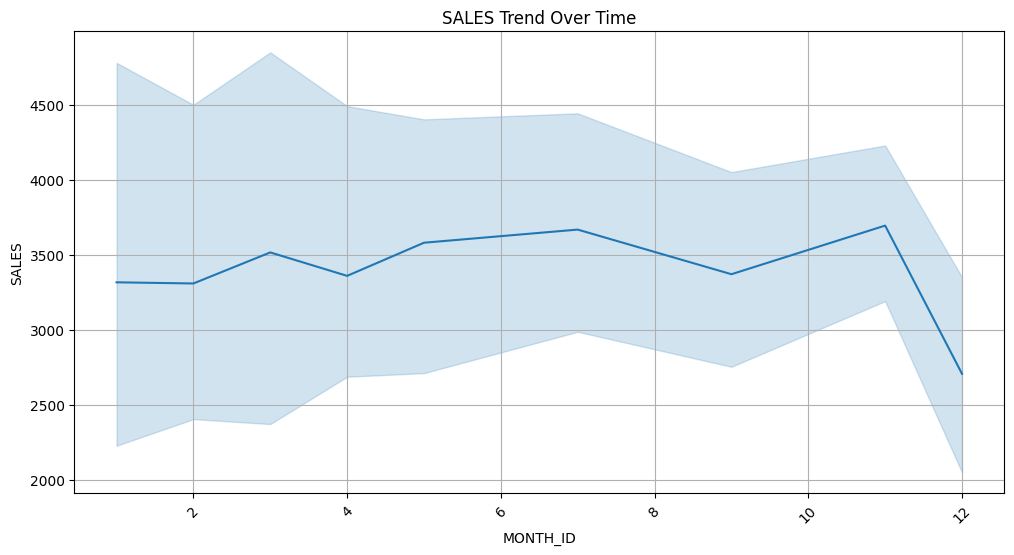

C:\Users\Saiashish\AppData\Local\Temp\ipykernel_11472\2981762424.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['STATE'], y=df['SALES'], estimator=sum, ci=None)


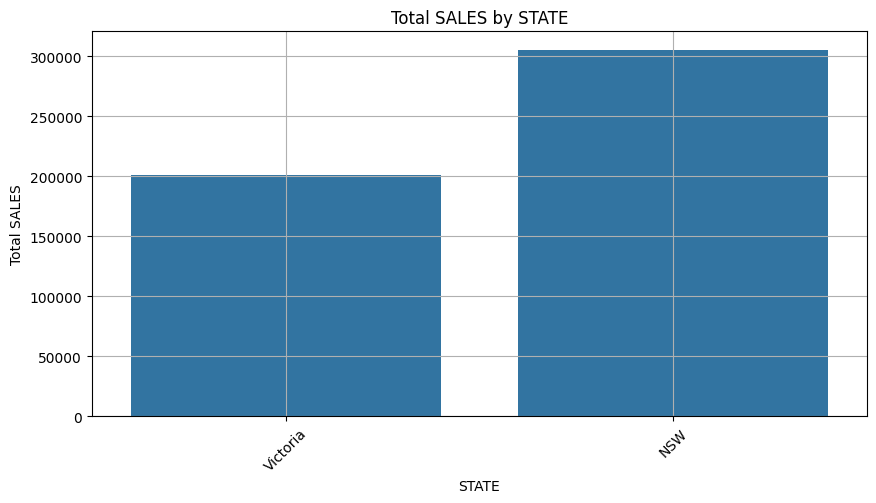

In [7]:
df = cleaned_data

if 'MONTH_ID' in df.columns and 'SALES' in df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(x=df['MONTH_ID'], y=df['SALES'])
    plt.title("SALES Trend Over Time")
    plt.xlabel("MONTH_ID")
    plt.ylabel("SALES")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Bar Plot - Category-wise Sales
if 'STATE' in df.columns and 'SALES' in df.columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x=df['STATE'], y=df['SALES'], estimator=sum, ci=None)
    plt.title("Total SALES by STATE")
    plt.xlabel("STATE")
    plt.ylabel("Total SALES")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

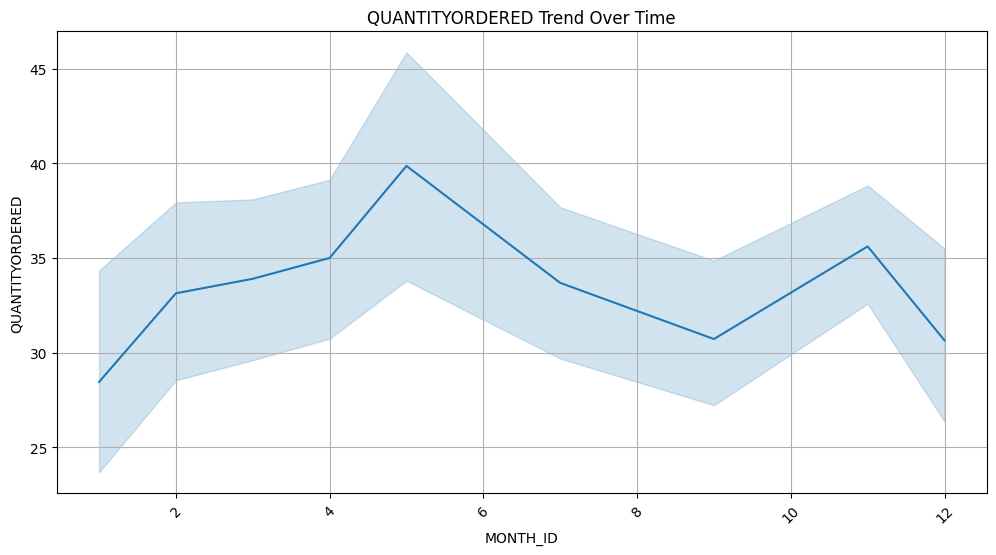

In [8]:
if 'MONTH_ID' in df.columns and 'QUANTITYORDERED' in df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(x=df['MONTH_ID'], y=df['QUANTITYORDERED'])
    plt.title("QUANTITYORDERED Trend Over Time")
    plt.xlabel("MONTH_ID")
    plt.ylabel("QUANTITYORDERED")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()